In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
filename_ts = r'C:\Users\60547\Documents\py\python_lianxi\datasets\datawhile\data.csv'
df=pd.read_csv(filename_ts,encoding='gbk')
print(df.columns)
df.head(5)

Index(['unnamedid', 'custid', 'trade_no', 'bank_card_no', 'low_volume_percent',
       'middle_volume_percent', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
    

,unnamedid,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,2.018050e+31,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,2.018050e+31,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,2.018050e+31,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,2.018050e+31,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,2.018050e+31,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [3]:
#查看object类型的数据  值的分布
print(df.bank_card_no.value_counts(),'\n')
print(df.reg_preference_for_trad.value_counts(),'\n')
print(df.source.value_counts(),'\n')
print(df.student_feature.value_counts())
df.select_dtypes(include=['object']).head(5)


卡号1    4754
Name: bank_card_no, dtype: int64 

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64 

xs    4754
Name: source, dtype: int64 

1.0    1754
2.0       2
Name: student_feature, dtype: int64


,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
0,卡号1,一线城市,xs,蒋红,2018/4/25,2018/4/19
1,卡号1,一线城市,xs,崔向朝,2018/5/3,2018/5/5
2,卡号1,一线城市,xs,王中云,2018/5/5,2018/5/1
3,卡号1,三线城市,xs,何洋洋,2018/5/5,2018/5/3
4,卡号1,一线城市,xs,赵洋,2018/4/15,2018/1/7


0    3561
1    1193
Name: status, dtype: int64


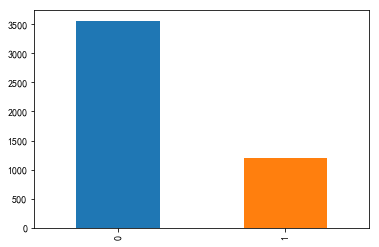

In [4]:
#查看标签列 status的分布均衡性(处理前)
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar')

In [5]:
#student_feature缺失太多直接丢弃,其他没有业务价值
drop_columns=['bank_card_no','source','id_name','unnamedid','custid','student_feature','trade_no']
df.drop(drop_columns,axis=1,inplace=True)

#日期处理为日期格式datetime，并生成新的一列 loans_time
df['latest_query_time']=pd.to_datetime(df['latest_query_time'])
df['loans_latest_time']=pd.to_datetime(df['loans_latest_time'])

#将timedelta格式转化为float类型(秒)
df['loans_time']=df['loans_latest_time']-df['latest_query_time']
df['loans_time']=df['loans_time'].dt.total_seconds().dropna()

#两列日期格式数据处理直接丢弃
datatime_data=['loans_latest_time','latest_query_time']
df.drop(datatime_data,axis=1,inplace=True)

#将城市进行数值化
map_dict={'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他':0}
df['reg_preference_for_trad']=df['reg_preference_for_trad'].map(map_dict)
df.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [6]:
#统计缺失值
print('缺失值:','\n',df.isnull().sum())

缺失值: 
 low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_amount                     0
historical_trans_day                        2
rank_trad_1_month                           2
trans_amount_3_month                        0
avg_consume_less_12_valid_month             2
abs                                         0
top_trans_count_last_1_month                2
avg_price_last_12_month    

In [7]:
#动作1：数量较小，直接丢弃
# df.dropna(inplace=True)

#动作2：缺失值以中位值进行填充
from sklearn.preprocessing import Imputer
columns=list(df)
imp=Imputer(missing_values=np.nan,strategy='median')
df=imp.fit_transform(df)
print('number after processing:',df.shape)
df=pd.DataFrame(df,columns=columns)

#再次统计缺失值
print('缺失值:','\n',(df.isnull().sum()))
df.head()

number after processing: (4754, 82)
缺失值: 
 low_volume_percent                        0
middle_volume_percent                     0
take_amount_in_later_12_month_highest     0
trans_amount_increase_rate_lately         0
trans_activity_month                      0
trans_activity_day                        0
transd_mcc                                0
trans_days_interval_filter                0
trans_days_interval                       0
regional_mobility                         0
repayment_capability                      0
is_high_user                              0
number_of_trans_from_2011                 0
first_transaction_time                    0
historical_trans_amount                   0
historical_trans_day                      0
rank_trad_1_month                         0
trans_amount_3_month                      0
avg_consume_less_12_valid_month           0
abs                                       0
top_trans_count_last_1_month              0
avg_price_last_12_month          

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [8]:
#丢掉方差为0即没有变化的列
df.drop(df.columns[df.std()==0],axis=1,inplace=True)
df.shape

(4754, 82)

0.0    3561
1.0    1193
Name: status, dtype: int64


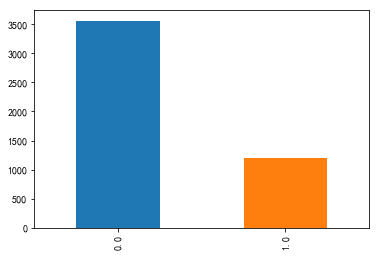

In [9]:
#查看标签列 status的分布均衡性(处理后)
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar')

In [10]:
#换种方式考察各列和目标列之间的相关性
# cor=df.corr()

# corr=np.abs(cor['status'].sort_values(ascending=False)).to_frame(name='corelation').reset_index()
# print(type(np.abs(cor['status'].sort_values(ascending=False))))
# #选取特征大于0.05的列进行保留
# deleted_corr_columns=list(corr[corr.corelation<0.05]['index'])
# print(deleted_corr_columns)
# df.drop(deleted_corr_columns,inplace=True,axis=1)
# corr

In [11]:
# #热力图研究相关性
# plt.figure(figsize=(54,46))
# corr=df.drop(['status'],axis=1).corr()
# #注意给lables值设置大小和格式,不然显示不清
# #show 列表名
# print(list(df))
# print(df.shape)
# sns.heatmap(corr,fmt='.2f',annot=True,cbar=False,annot_kws={'size':24,'weight':'bold'})


#将相关系数超过0.9的进行筛选，只保留一列

In [12]:
# further_drop=['trans_top_time_last_1_month','trans_fail_top_count_enum_last_12_month','apply_score','consfin_avg_limit']
# df.drop(further_drop,axis=1,inplace=True)

以上暂不使用

In [13]:
train_x=df.drop(['status'],axis=1)
train_y=df['status']

print(train_x.shape)
train_x.head()

(4754, 81)


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [14]:
#拆分测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=2018)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)


(3327, 81)
(1427, 81)
(1427,)


In [15]:
#引入模型进行训练
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


C:\Users\60547\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
#定义计算iv值的函数
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.

    Output:
      * iv: float,
      * data: pandas.DataFrame
    """
    lst = []
    df[feature] = df[feature].fillna('NULL')

    for i in range(df[feature].nunique()):  # nuinque()是查看该序列(axis=0/1对应着列或行)的不同值的数量个数
        val = list(df[feature].unique())[i]
        lst.append([feature,
                    val,  # Value
                    df[df[feature] == val].count()[feature],  # all
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # good rate
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]])  # bad rate
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print("IV = ", data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

column_headers = list(df.columns.values)
# print(column_headers)

d=[]
for x in column_headers:
    IV_1, data = calc_iv(df, x, 'status')
    d.append(IV_1)
#整理成Series类型并合并
column_headers=pd.Series(column_headers,name='feature')
d=pd.Series(d,name='iv_value')

# print(column_headers)
iv_result=pd.concat([column_headers,d],axis=1)
iv_result.sort_values(by='iv_value',ascending=False)

#     print('{}： {}'.format(x, IV_1))

,feature,iv_value
51,loans_score,0.615595
29,trans_fail_top_count_enum_last_1_month,0.598137
63,history_fail_fee,0.507044
42,apply_score,0.488201
40,first_transaction_day,0.486122
13,first_transaction_time,0.486122
10,repayment_capability,0.439096
33,max_cumulative_consume_later_1_month,0.395649
55,loans_overdue_count,0.387895
19,abs,0.372721


在机器学习的二分类问题中，IV值（Information Value）主要用来对输入变量进行编码和预测能力评估。特征变量IV值的大小即表示该变量预测能力的强弱。IV 值的取值范围是[0, 正无穷)，如果当前分组中只包含响应客户或者未响应客户时，IV = 正无穷。
量化指标含义如下：< 0.02useless for prediction、0.02 to 0.1Weak predictor、0.1 to 0.3Medium predictor、0.3 to 0.5Strong predictor 、>0.5 Suspicious or too good to be true。


In [17]:
#筛选IV值大于0.02的作为有效可预测列
iv_below=iv_result[iv_result['iv_value']<0.02]
deleted_cols_by_iv=list(iv_below.feature)
deleted_cols_by_iv.remove('status')

In [18]:
x_train.drop(deleted_cols_by_iv,axis=1,inplace=True)
x_test.drop(deleted_cols_by_iv,axis=1,inplace=True)

In [19]:
# 此时选择将x_train进行标准化
from sklearn.preprocessing import StandardScaler
columns=list(x_train)
x_train=StandardScaler().fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=columns)

x_test=StandardScaler().fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=columns)

In [20]:
#定义返回y_pred和y_pred_proba的函数，并能打印训练集和测试集的精度以及ROC曲线面积
def model_metrics(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
#     auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    #加上return方便后续计算混淆矩阵效果
    return y_test_proba,y_test_pred

In [21]:
#调入随机森林模型，无调参之前看下分数
rf=RandomForestClassifier()

model_metrics(rf,x_train,x_test,y_train,y_test)


[准确率] 训练集： 0.9826 测试集： 0.7547
[auc值] 训练集： 0.9995 测试集： 0.6880


(array([0.2, 0.1, 0.6, ..., 0.4, 0.3, 0.4]),
 array([0., 0., 1., ..., 0., 0., 0.]))

In [22]:
feature_importance=sorted(zip(rf.feature_importances_,list(x_train)),reverse=True)
feature_importance,len(feature_importance)


([(0.05848106502612711, 'trans_fail_top_count_enum_last_1_month'),
  (0.051855493931781925, 'history_fail_fee'),
  (0.04576956107662245, 'loans_score'),
  (0.03336439915677017, 'apply_score'),
  (0.021738994986207707, 'trans_fail_top_count_enum_last_6_month'),
  (0.018979037561358523, 'trans_amount_3_month'),
  (0.018681825845054376, 'repayment_capability'),
  (0.018309039997111497, 'max_cumulative_consume_later_1_month'),
  (0.018070314779604607, 'rank_trad_1_month'),
  (0.01669730359605961, 'loans_latest_day'),
  (0.016689384392783887, 'loans_overdue_count'),
  (0.01614599512509096, 'trans_top_time_last_6_month'),
  (0.015667318629635493, 'trans_day_last_12_month'),
  (0.01552929054182993, 'loans_long_time'),
  (0.015199044901889235, 'trans_days_interval_filter'),
  (0.01515380993320203, 'first_transaction_time'),
  (0.014898729460195635, 'first_transaction_day'),
  (0.01465019890634602, 'historical_trans_day'),
  (0.014551497289956111, 'trans_fail_top_count_enum_last_12_month'),
  (

In [37]:
x_train.head(2)

,trans_days_interval_filter,repayment_capability,first_transaction_time,historical_trans_day,rank_trad_1_month,trans_amount_3_month,trans_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,max_cumulative_consume_later_1_month,first_transaction_day,trans_day_last_12_month,apply_score,query_sum_count,loans_score,loans_overdue_count,history_fail_fee,loans_long_time,loans_latest_day
0,0.001348,-0.026841,1.284716,-0.255555,1.403613,-0.394483,0.698483,2.238573,0.935729,0.738031,-0.239209,-1.073003,0.524916,-0.802087,0.654778,-0.730383,1.522127,1.474020,0.577345,-0.867756
1,-0.088364,-0.065450,1.292473,-1.018498,0.647734,-0.454640,-0.240511,-0.339746,-0.123677,0.738031,-0.216472,-1.151965,-0.373382,-0.701927,-0.709423,-0.528325,0.239423,-0.256538,0.606743,-0.523012


In [38]:
#按照排序,使用前30列为有用列,其他为无用列
useless=[]
for feature in x_train.columns:
    if feature in [t[1] for t in feature_importance[30:]]:
        useless.append(feature)
x_train.drop(useless,axis=1,inplace=True)
x_test.drop(useless,axis=1,inplace=True)
x_train.shape

(3327, 20)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve

lr_model = LogisticRegression()
svm_model = svm.SVC(probability=True)
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
knn_model=KNeighborsClassifier()
gbdt_model=GradientBoostingClassifier(n_estimators=100)
rf_model=RandomForestClassifier(n_estimators=100)


models={'LR':lr_model,'svm':svm_model,'knn':knn_model,'decision tree':dt_model,
        'xgboost':xgb_model,'gbt':gbdt_model,'random forest':rf_model}


In [40]:
df_result=pd.DataFrame(columns=['model','accuracy','precision','recall','f1_score','roc_auc_score'])

In [41]:
#定义评价函数,根据y_pred和y_test返回acc,p,r和f1值
def evaluate(y_pred,y_test):
    acc=accuracy_score(y_test,y_pred)
    p=precision_score(y_test,y_pred)
    r=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    return acc,p,r,f1

#进一步每个模型model进行迭代,并将df_result进行填充,并计算auc值
row=0  
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[:,1]
    acc,p,r,f1=evaluate(y_pred,y_test)
    auc=roc_auc_score(y_test,y_pred_proba)
    df_result.loc[row]=[name,acc,p,r,f1,auc]
    row+=1
    
df_result
    

C:\Users\60547\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,model,accuracy,precision,recall,f1_score,roc_auc_score
0,LR,0.777856,0.634615,0.275766,0.384466,0.761309
1,svm,0.773651,0.650000,0.217270,0.325678,0.712304
2,knn,0.744219,0.484375,0.259053,0.337568,0.659674
3,decision tree,0.670638,0.368171,0.431755,0.397436,0.591346
4,xgboost,0.782060,0.630435,0.323120,0.427256,0.758805
5,gbt,0.776454,0.602041,0.328691,0.425225,0.753088
6,random forest,0.779958,0.634731,0.295265,0.403042,0.749803


模型中最重要的指标为recall score何roc_auc_score，综合考量xgboost模型分类效果最好，用混淆矩阵进行可视化

In [28]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()

In [29]:
#引入混淆矩阵对分类的结果进行可视化
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[准确率] 训练集： 0.8392 测试集： 0.7821
[auc值] 训练集： 0.8836 测试集： 0.7588


C:\Users\60547\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\60547\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


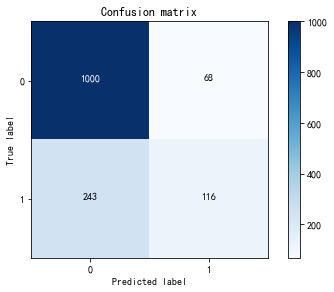

In [42]:
cnf_xgb=confusion_matrix(y_test,model_metrics(xgb,x_train,x_test,y_train,y_test)[1])
class_names=[0,1]
plot_confusion_matrix(cnf_xgb,class_names)

特征工程总结:
选取模型随机森林
1#初步的业务角度丢弃了9列，保留81列特征列分析(包含标签列status)
2#IV值筛选,大于0.02的值作为有效预测列，筛选得到71列
3#随机森林模型feature importance筛选,按照排序保留了30列作为最后的特征分析列
4#引入多个模型进行训练计算，并返回其精度,查准率,查全率等
具体结果如图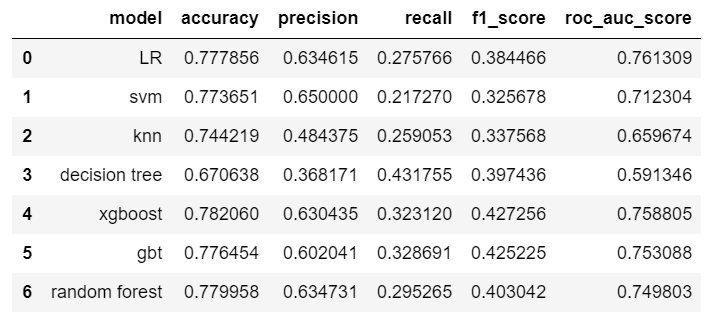
#补充以下
特征工程还可关系热力图进行筛选,此处没有展示(代码屏蔽),
还有卡方检验方法,后续进行尝试
1#将各列和标签列status的相关性进行计算线性相关性
2#筛选小于corr<0.05即认定为对标签列无影响的列进行删除
3#剩下的特征列中进一步筛选，用关系型热力图两两比较，大于0.90的只保留一列
后续思考：上述模型中计算出来的recall均不高,决策树模型反而可以做到最高的查全率,但是查准率却很低,如果综合考虑的话应该是xgboost模型最好,多个指标之间如何取舍(f1_score或者roc-auc score？）
